In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d


In [34]:
data = []
for trajectory in range(100):
    ini = np.zeros(3)
    traj = []
    for step in range(1000):
        incr = np.random.randint(-1,2, size=3)
        ini += incr
        traj.append(ini.copy())
    data.append(traj)

In [35]:
print(np.array(data).shape)
data = np.array(data)


(100, 1000, 3)


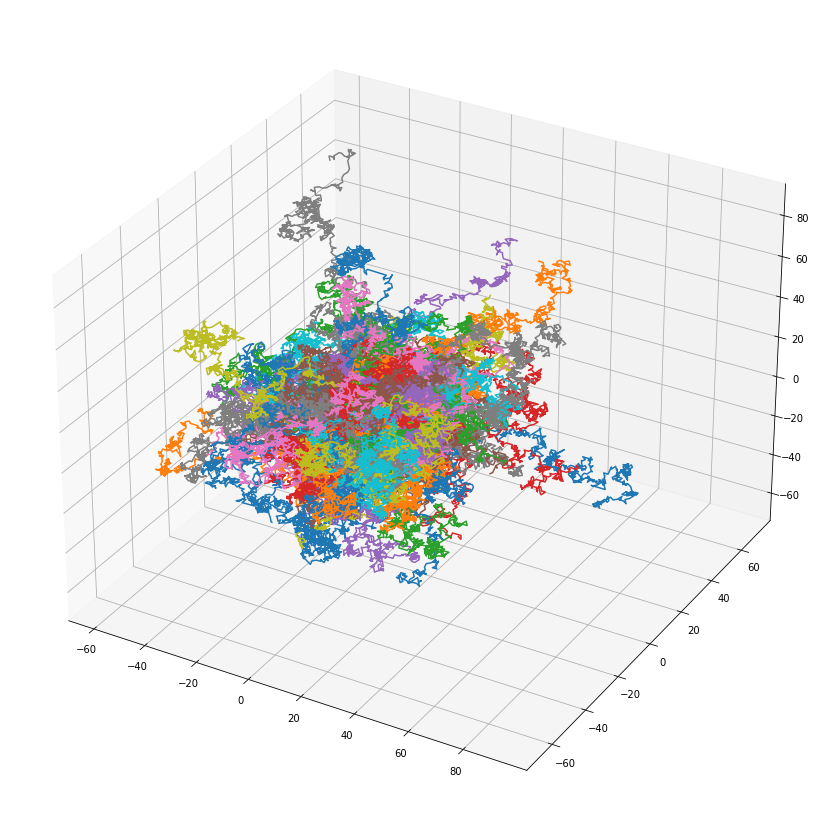

In [36]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
for d in data:
    ax.plot3D(d[:,0], d[:,1], d[:,2])
plt.show()

In [37]:
import csv

data = []
inis = []
for j in range(3):
    with open(f"../results/eval_2/coords_{j}.csv") as csv_file:
        trajectory = []
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for i, row in enumerate(csv_reader):
            if not i:
                inis.append(row)
            trajectory.append(row)
    data.append(trajectory[:3500])

In [38]:
len(data)

3

In [39]:
data = np.array(data, dtype=np.float32)
inis = np.array(inis, dtype=np.float32)

In [40]:
data.shape

(3, 1501, 3)

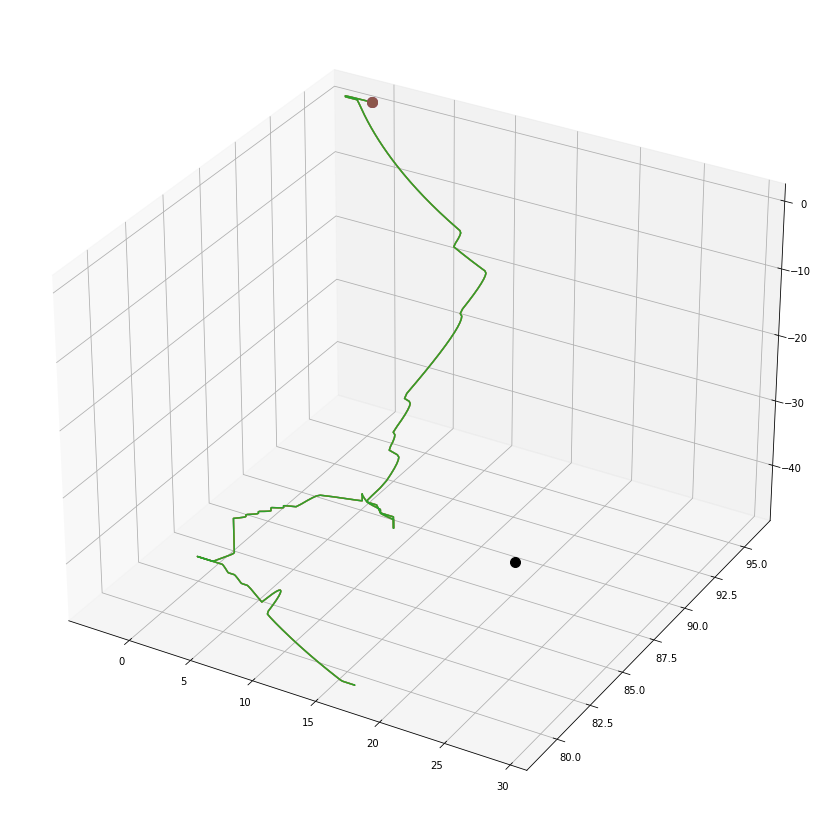

In [41]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
for d in data:
    ax.plot3D(d[:,0], d[:,1], d[:,2])
ax.plot([28.94], [79.0], [-21.95], marker='o', color='black', markersize=10)
for ini in inis:
    ax.plot([ini[0]], [ini[1]], [ini[2]], marker='o', markersize=10)
plt.show()

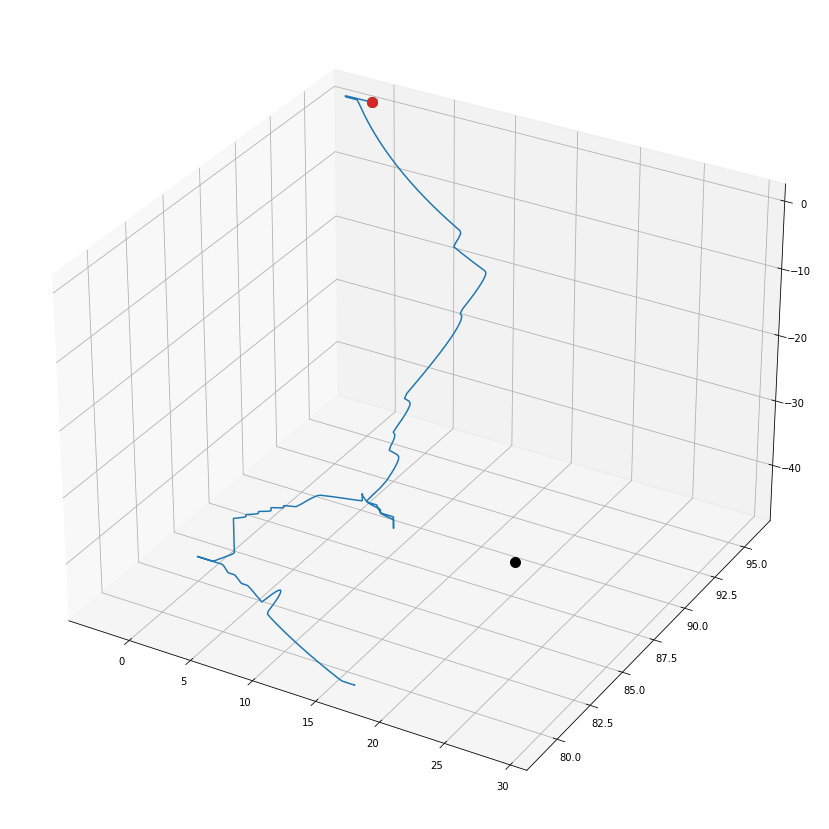

In [42]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.plot3D(data[0,:,0], data[0,:,1], data[0,:,2])
ax.plot([28.94], [79.0], [-21.95], marker='o', color='black', markersize=10)
for ini in inis:
    ax.plot([ini[0]], [ini[1]], [ini[2]], marker='o', markersize=10)
plt.show()

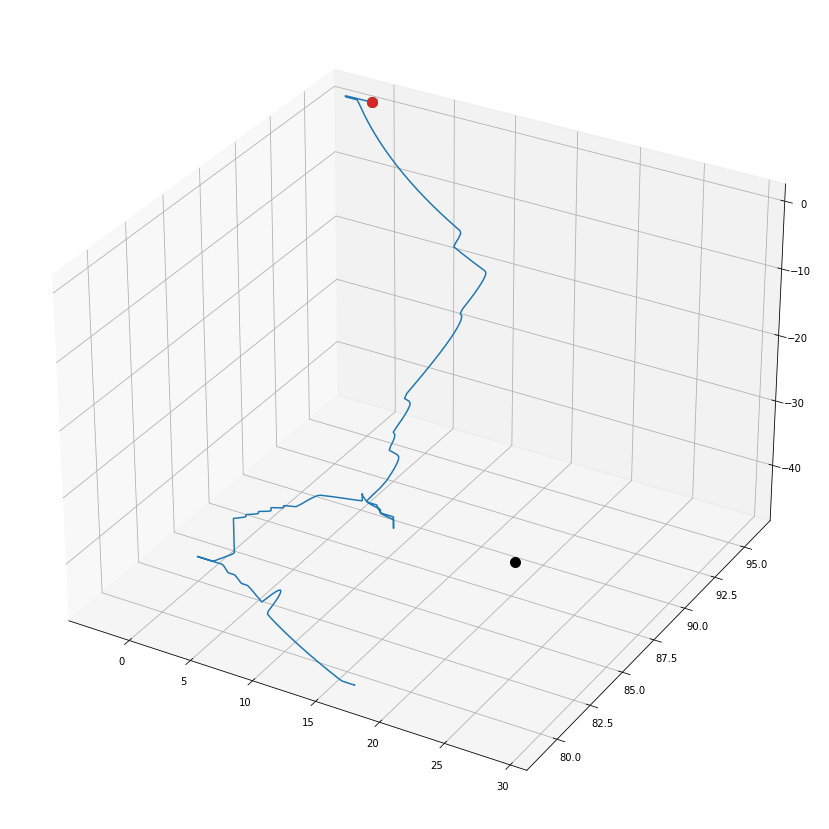

In [43]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.plot3D(data[1,:,0], data[1,:,1], data[1,:,2])
ax.plot([28.94], [79.0], [-21.95], marker='o', color='black', markersize=10)
for ini in inis:
    ax.plot([ini[0]], [ini[1]], [ini[2]], marker='o', markersize=10)
plt.show()

In [44]:
import csv

data = []
inis = []
for j in range(3):
    with open(f"../results/eval_3/coords_{j}.csv") as csv_file:
        trajectory = []
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for i, row in enumerate(csv_reader):
            if not i:
                inis.append(row)
            trajectory.append(row)
    data.append(trajectory[:1500])

In [52]:
# We convert data to numpy later, because trajectories can have different length, so it'd fail if you try to
# convert all trajectories together
inis = np.array(inis, dtype=np.float32)

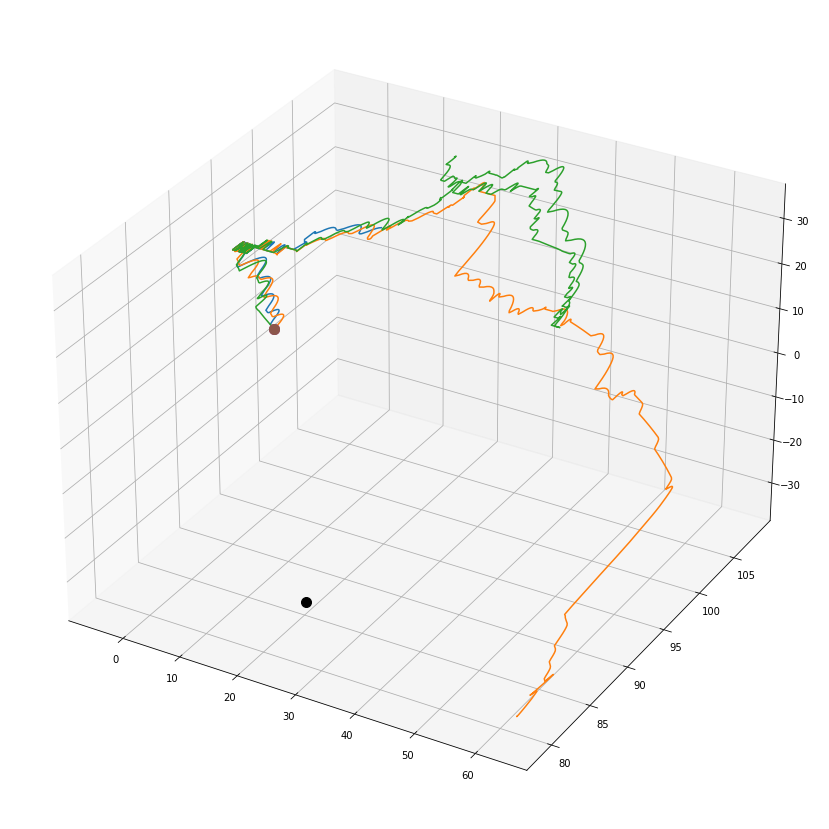

In [53]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
for d in data:
    d = np.array(d, dtype=np.float32)
    ax.plot3D(d[:,0], d[:,1], d[:,2])
ax.plot([28.94], [79.0], [-21.95], marker='o', color='black', markersize=10)
for ini in inis:
    ax.plot([ini[0]], [ini[1]], [ini[2]], marker='o', markersize=10)
plt.show()